In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import scipy.interpolate as ip

원하는 이미지 3중 1택
이미지의 크기를 500x500으로 변경
Nearest neighbor, bilinear, bicubic으로 보간한 결과 비교 

+) 이미지 회전등 시도

<class 'astropy.io.fits.hdu.hdulist.HDUList'>
Filename: image3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (100, 100)   uint8   


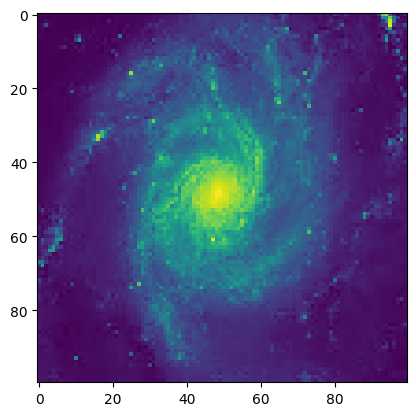

In [2]:
pic = fits.open('image3.fits')
print(type(pic))
pic.info()
pic[0].header

data_arr = pic[0].data

plt.imshow(data_arr)

In [3]:
from scipy.interpolate import griddata

x = np.linspace(0, 1, data_arr.shape[1])
y = np.linspace(0, 1, data_arr.shape[0])
X, Y = np.meshgrid(x, y)

x_new = np.linspace(0, 1, 500)
y_new = np.linspace(0, 1, 500)
X_new, Y_new = np.meshgrid(x_new, y_new)

result_nearest = griddata((X.flatten(), Y.flatten()), data_arr.flatten(), (X_new, Y_new), method='nearest')
result_bilinear = griddata((X.flatten(), Y.flatten()), data_arr.flatten(), (X_new, Y_new), method='linear')
result_bicubic = griddata((X.flatten(), Y.flatten()), data_arr.flatten(), (X_new, Y_new), method='cubic')

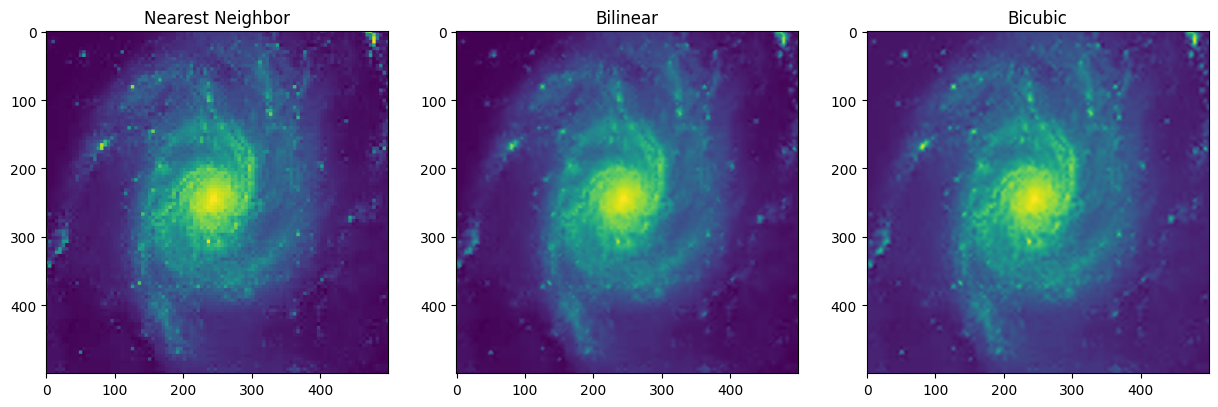

In [4]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Nearest Neighbor")
plt.imshow(result_nearest)

plt.subplot(1, 3, 2)
plt.title("Bilinear")
plt.imshow(result_bilinear)

plt.subplot(1, 3, 3)
plt.title("Bicubic")
plt.imshow(result_bicubic)

plt.show()

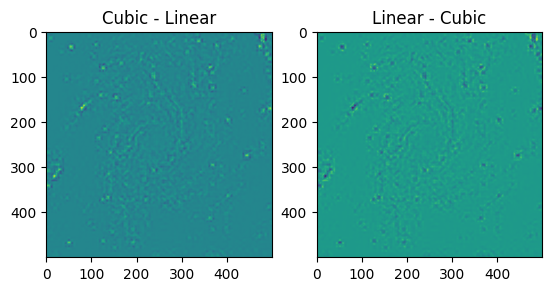

In [5]:
result_re = result_bicubic - result_bilinear

plt.figure()
plt.subplot(1, 2, 1)
plt.title("Cubic - Linear")
plt.imshow(result_re)

plt.subplot(1, 2, 2)
plt.title("Linear - Cubic")
plt.imshow(-result_re)

plt.show()

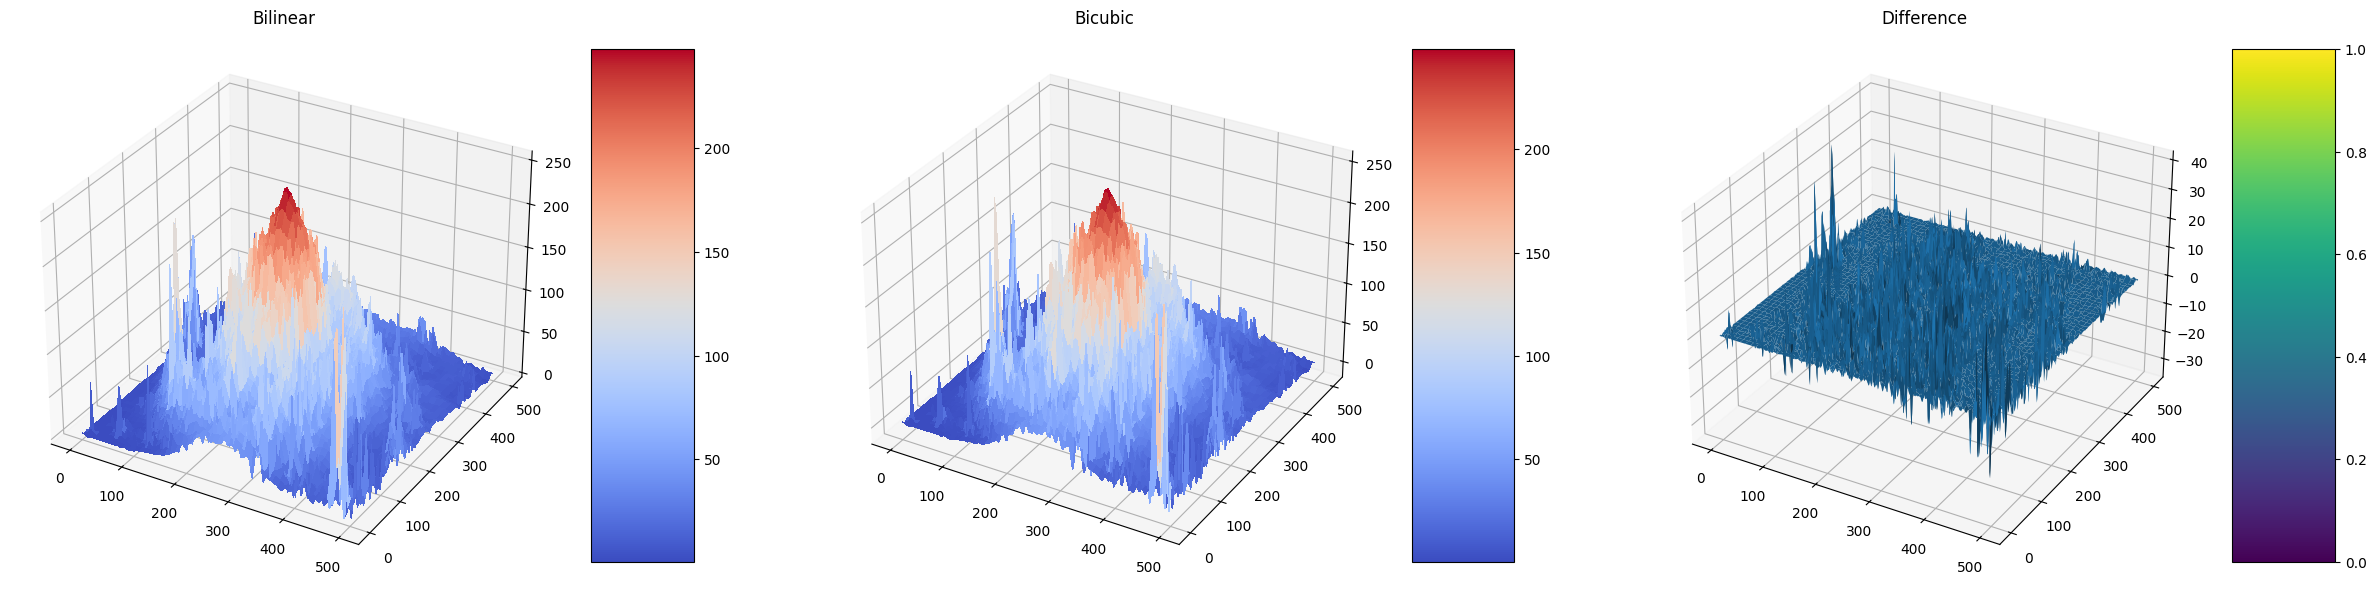

In [6]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig = plt.figure(figsize=(30, 30))

# When bilinear
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.set_title("Bilinear")

X = np.arange(0, 500, 1)
Y = np.arange(0, 500, 1) 
X, Y = np.meshgrid(X, Y)
Z1 = result_bilinear
Z2 = result_bicubic

surf = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

# When bicubic
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.set_title("Bicubic")
surf = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

# difference
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.set_title("Difference")
surf = ax.plot_surface(X, Y, result_re)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


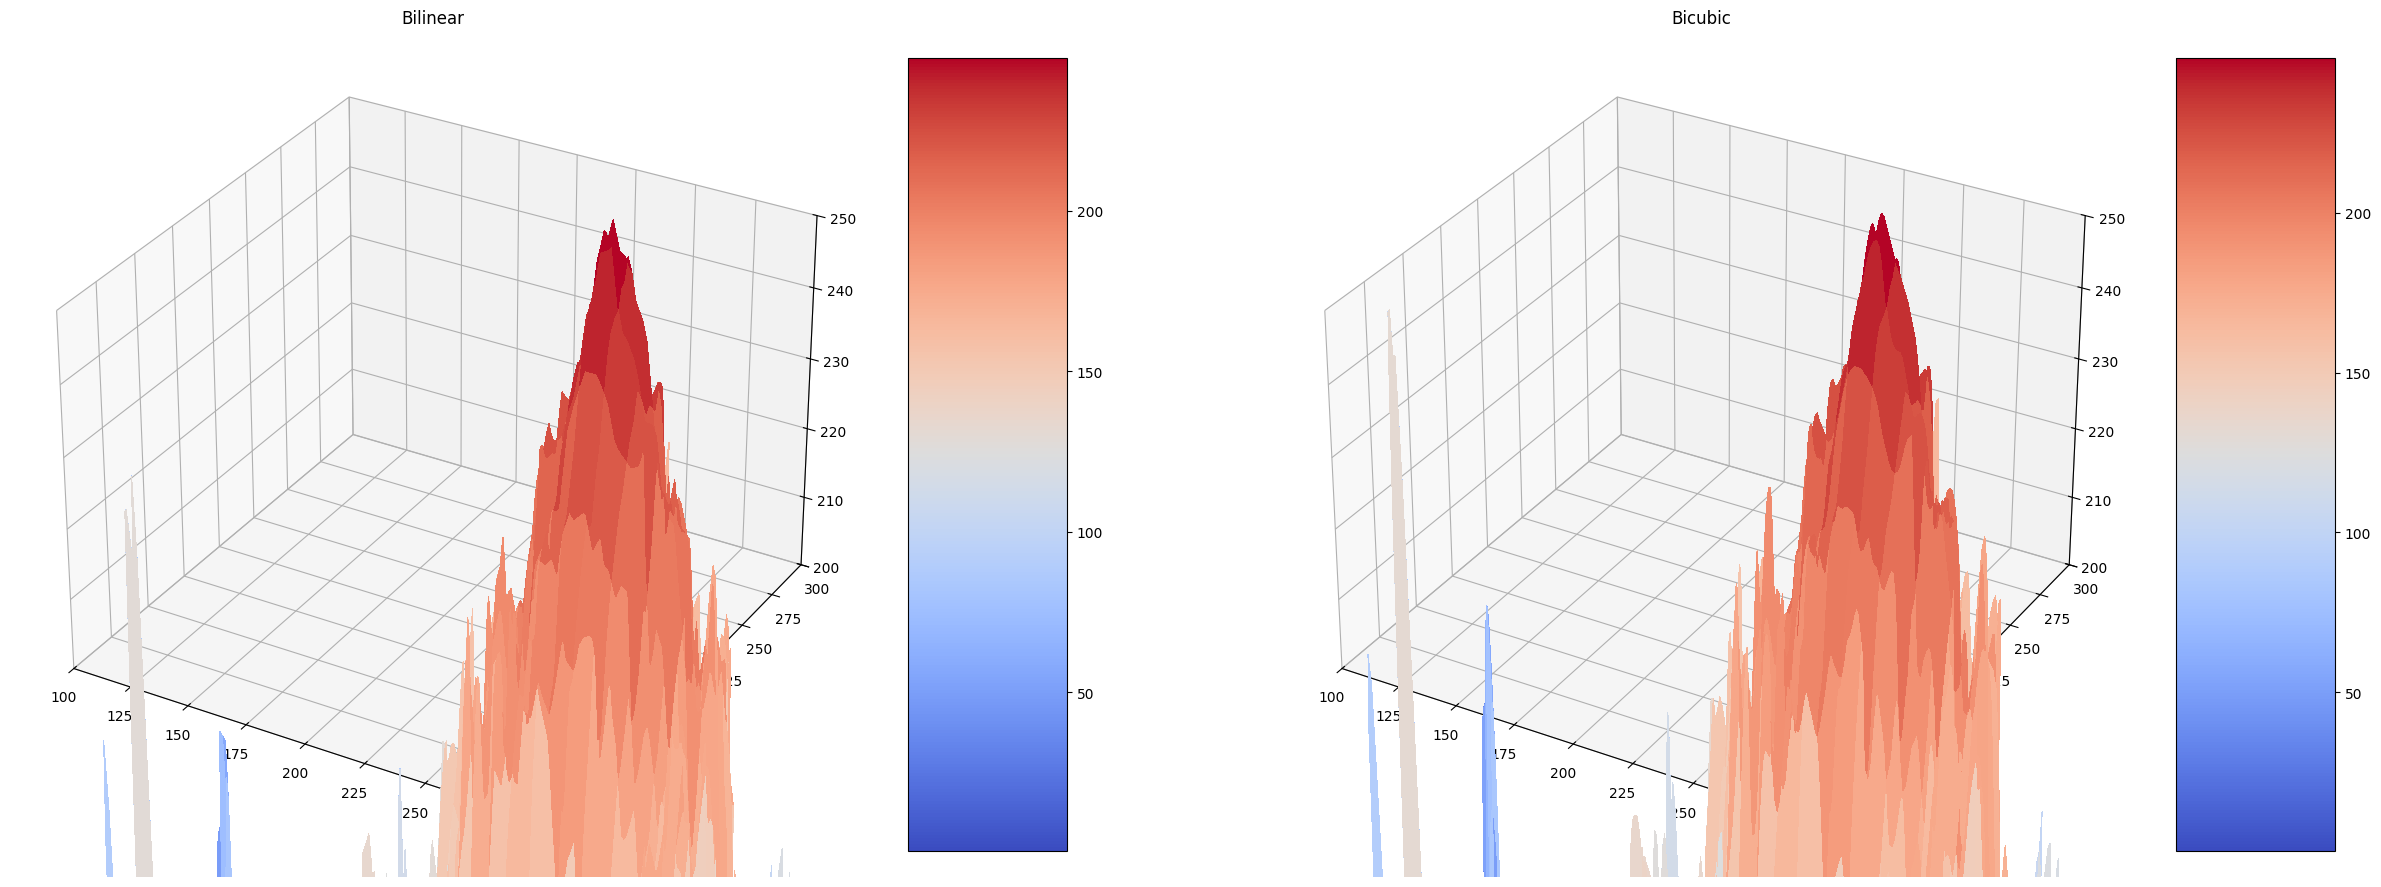

In [7]:
fig = plt.figure(figsize=(30, 30))

# When bilinear
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title("Bilinear")
ax.set_ylim(100, 300)
ax.set_xlim(100, 300)
ax.set_zlim(200, 250)

X = np.arange(0, 500, 1)
Y = np.arange(0, 500, 1) 
X, Y = np.meshgrid(X, Y)
Z1 = result_bilinear
Z2 = result_bicubic

surf = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

# When bicubic
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title("Bicubic")
ax.set_ylim(100, 300)
ax.set_xlim(100, 300)
ax.set_zlim(200, 250)
surf = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

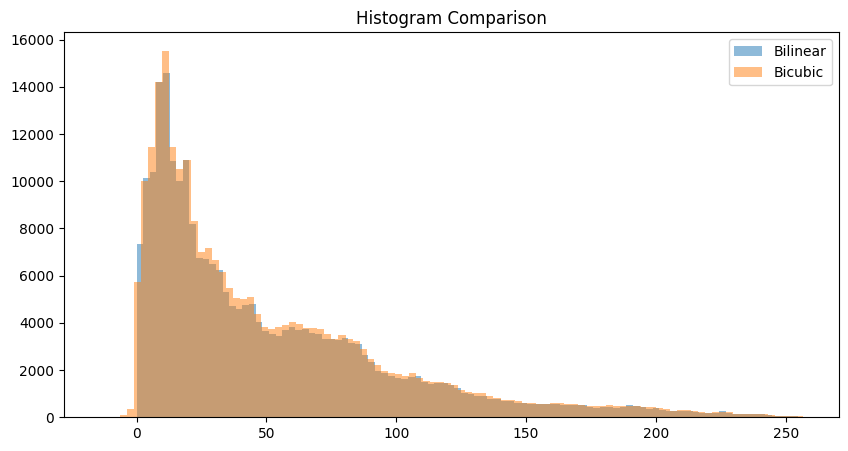

In [8]:
plt.figure(figsize=(10, 5))
plt.hist(result_bilinear.flatten(), bins=100, alpha=0.5, label='Bilinear')
plt.hist(result_bicubic.flatten(), bins=100, alpha=0.5, label='Bicubic')
plt.title("Histogram Comparison")
plt.legend()
plt.show()

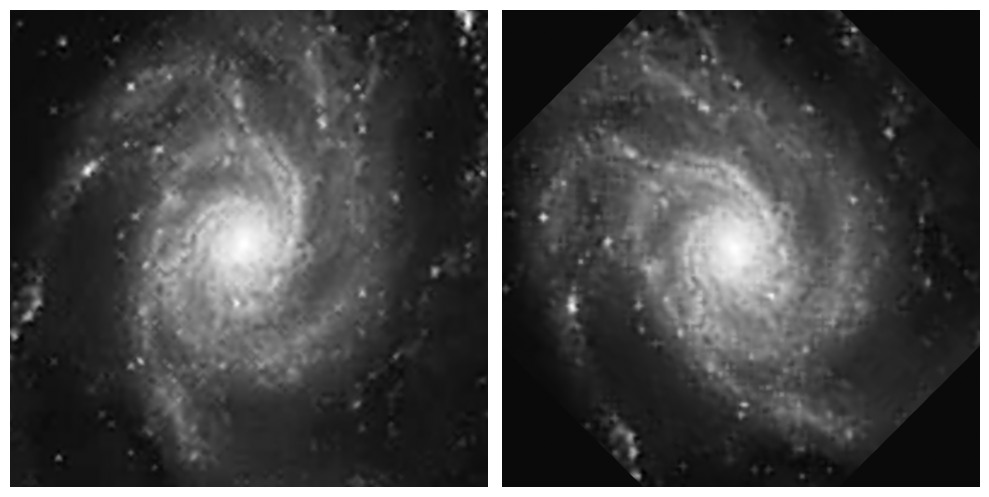

In [9]:
# Rotation
from scipy import ndimage, datasets

bef_rot = result_bicubic.copy()

fig = plt.figure(figsize=(10, 10))
ax1, ax2 = fig.subplots(1, 2)
img_45 = ndimage.rotate(bef_rot, 45, reshape=False)
ax1.imshow(bef_rot, cmap='gray')
ax1.set_axis_off()
ax2.imshow(img_45, cmap='gray')
ax2.set_axis_off()
fig.set_layout_engine('tight')
plt.show()

In [20]:
x1 = np.linspace(0, 1, img_45.shape[1])
y1 = np.linspace(0, 1, img_45.shape[0])
X1, Y1 = np.meshgrid(x1, y1)

x1_new = np.linspace(0, 1, 500)
y1_new = np.linspace(0, 1, 500)
X1_new, Y1_new = np.meshgrid(x1_new, y1_new)

result_bilinear_45 = griddata((X1.flatten(), Y1.flatten()), img_45.flatten(), (X1_new, Y1_new), method='linear')
result_bicubic_45 = griddata((X1.flatten(), Y1.flatten()), img_45.flatten(), (X1_new, Y1_new), method='cubic')

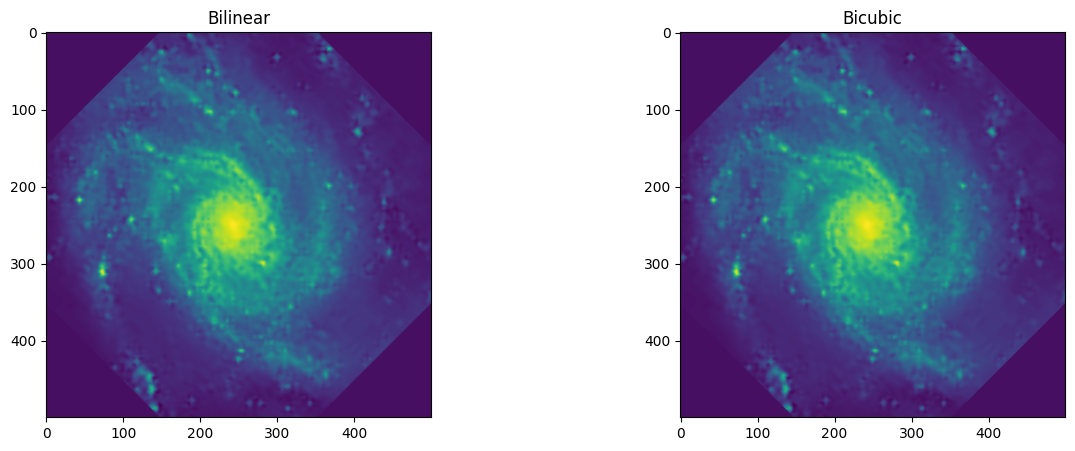

In [55]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("Bilinear")
plt.imshow(result_bilinear_45)

plt.subplot(1, 2, 2)
plt.title("Bicubic")
plt.imshow(result_bicubic_45)

plt.show()